## Homework 2

###### Guidelines to be followed (we can discuss and adjust of course, but to be consistent in the way we code)

- Jupyter Notebook should **not contain too much code** (the less code is stored here the better since it makes things much clearer)
- Pure code should be stored in **seperate .py files** (easier to review and better for version control)
- Lets try to **comment** everything we do from the beginning so that we don't have to do this boring and annoying work at the end
- Every time we have the chance of **plotting** some information lets try to do it (data visualisation is very important)

#### Some useful data set information

- Each row represents an event. There are several different types of events however:
    - **View**: A user viewed a product
    - **Cart**: A user added a product to a shopping cart
    - **Removefromcart**: A user removed a product from the shopping cart
    - **Purchase**: A user purchased a product
    
    
- A typical funnel of a client would be (leading to 3 different rows in the dataset: view >> cart >> purchase)


- **event_time**: Time of the event
- **event_type**: Event type (see above for event types)
- **product_id**: Unique identifier of product
- **category_id**: Category ID of product
- **category_code**: Code of category. If product is not a relevant one the category code is left empty (meaningfull missing)
- **brand**: Brand of product (can be missing, I guess this is not a meaningful missing)
- **price**: Float price of product
- **user_id**: Unique identifier of user
- **user_session**: Unique identifier of user session (1 *user_id* can have several *user_session* over time)


- **Example**: User with *userid* during session *usersession* added to shopping cart (*eventtype == cart*) the product *productid* of the brand *brand* of category *categorycode* with a given *price* at a given *event_time* 


**Some useful info**

1. Price is unique by product_id and event_time
    - y =full_data_set.groupby([full_data_set.event_time, full_data_set.product_id]).price.nunique()
    - len(y) == y.sum()

In [1]:
%load_ext autoreload
%autoreload 2

#### Import library and files

In [1]:
import pickle
import pandas as pd
import functionality_new as funcs

## Research Question 1

A marketing funnel describes your customer’s journey with your e-commerce. It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing funnels map routes to conversion and beyond. Suppose your funnel involves just three simple steps: 1) view, 2) cart, 3) purchase. Which is the rate of complete funnels?
- What’s the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc).
- How many times, on average, a user views a product before adding it to the cart?
- What’s the probability that products added once to the cart are effectively bought?
- What’s the average time an item stays in the cart before being removed?
- How much time passes on average between the first view time and a purchase/addition to cart?


**Comments**:

Zhibek


Before getting into the specific questions we would like to highlight some interesting observations we have done on the data (data issues) and discuss how we are planning to overcome/treat them:

a. The Funnel is not necesarilly view>>cart>>purchase. A user can view a product and buy it without having to put it into the cart. No action needed for this point but it is good to keep in mind when reviewing final results.

In [4]:
funcs.customer_journey_funnel(full_data_set)

user_id    user_session                          event_type
356520186  3e3403b6-2a19-4a1d-aef2-ee4dce0dc943  purchase       1
                                                 view           5
           ad1e4257-71ec-4638-b31d-9fa4033ae155  view           1
384989212  27923ca4-99d6-4652-acad-c4fd270ef902  cart           1
                                                 view           8
386070015  49d03116-3c95-4e13-8b9c-e3be97551fe8  cart           1
                                                 view           4
393619196  17de28bd-0182-44c0-8a19-5d5b8c07d60e  view           3
           ed5d037e-be8c-4c94-a8b3-ec881eecdb33  cart           2
                                                 view           2
397023870  85566778-28dd-439e-958f-a5c972133c3e  purchase       1
                                                 view           3
440756116  c31bc5b7-e14d-463c-89b0-594688e4e69d  purchase       1
                                                 view           3
441259588  69e19

b. We have observed that for unique user_sessions we can have different user_ids. We consider this to be an issue on the user_id value since the event_time in general seem to be very close to each other (we consider it hard that in seconds a person is able to change user_id while still having the same user_session). Since we have not found a clear pattern on how to fix this issue we will ignore it for now (also since the amount of cases in which this occurs is almost insignificant)

In [12]:
funcs.user_session_user_id(full_data_set)

The percentage of errors is: 0.005392925156310565  %


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
4750,2019-10-01 02:27:45 UTC,view,10300637,2053013553115300101,NaN,silverlit,14.39,555463297,2759bd71-1333-4348-816d-c02912f6ebd4
5094,2019-10-01 02:28:27 UTC,view,10301026,2053013553115300101,NaN,silverlit,11.56,555463292,2759bd71-1333-4348-816d-c02912f6ebd4
155769,2019-10-01 05:26:28 UTC,view,4100138,2053013561218695907,NaN,sony,413.91,555496461,e5fa54c1-935b-41e1-bb95-06fd18cad496
167383,2019-10-01 05:37:04 UTC,view,4100346,2053013561218695907,NaN,sony,391.00,523810456,e5fa54c1-935b-41e1-bb95-06fd18cad496
434366,2019-10-01 09:24:58 UTC,view,1002629,2053013555631882655,electronics.smartphone,apple,377.09,555565912,fa8092eb-7df8-4bcd-866a-3b2b8eeafea5
434800,2019-10-01 09:25:20 UTC,view,1002628,2053013555631882655,electronics.smartphone,apple,397.95,555565910,fa8092eb-7df8-4bcd-866a-3b2b8eeafea5
435235,2019-10-01 09:25:43 UTC,view,1002629,2053013555631882655,electronics.smartphone,apple,377.09,555565910,fa8092eb-7df8-4bcd-866a-3b2b8eeafea5
435468,2019-10-01 09:25:55 UTC,view,1002629,2053013555631882655,electronics.smartphone,apple,377.09,555565910,fa8092eb-7df8-4bcd-866a-3b2b8eeafea5
435552,2019-10-01 09:25:59 UTC,view,1002629,2053013555631882655,electronics.smartphone,apple,377.09,555565910,fa8092eb-7df8-4bcd-866a-3b2b8eeafea5
451234,2019-10-01 09:39:11 UTC,view,1004249,2053013555631882655,electronics.smartphone,apple,738.39,555570137,42a39e3a-1ed6-40db-be9c-b21182f3dbc3


Question 1.a.

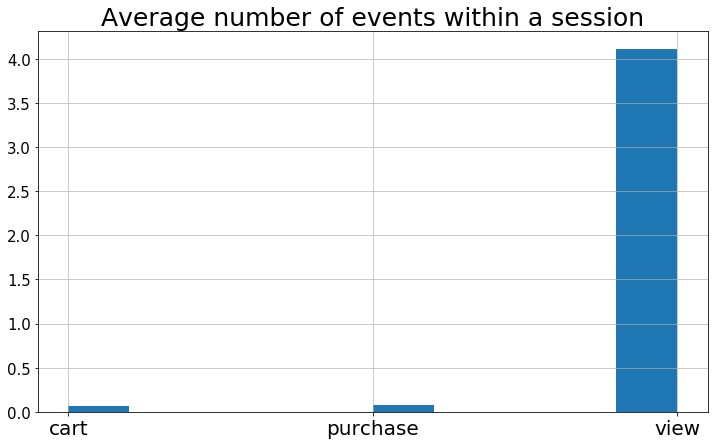

In [7]:
funcs.events_per_session(data_set=full_data_set)

Question 1.b.

In [1]:
funcs.average_views_before_cart(full_data_set)

NameError: name 'funcs' is not defined

Question 1.c.

In [4]:
funcs.probability_purchase_given_cart(full_data_set)

Question 1.d.

In [5]:
view_cart_data_set = full_data_set[(full_data_set.event_type == 'view') | (full_data_set.event_type == 'cart')]
cart_data_set = full_data_set[full_data_set.event_type == 'cart']

In [10]:
cart_and_view = view_cart_data_set[['event_time', 'event_type', 'user_session', 'product_id']].merge(
        cart_data_set[['event_time', 'user_session', 'product_id']], how='right',
        on=['product_id', 'user_session'], suffixes=('_view', '_cart'))
cart_and_view.sort_values(by=['user_session', 'product_id', 'event_time_view'])

,event_time_view,event_type,user_session,product_id,event_time_cart
142377,2019-11-01 09:53:55 UTC,view,000d3153-6d13-49dd-b365-0ae2291f7fb8,1005115,2019-11-01 09:54:24 UTC
142378,2019-11-01 09:54:24 UTC,cart,000d3153-6d13-49dd-b365-0ae2291f7fb8,1005115,2019-11-01 09:54:24 UTC
142379,2019-11-01 09:54:29 UTC,view,000d3153-6d13-49dd-b365-0ae2291f7fb8,1005115,2019-11-01 09:54:24 UTC
142380,2019-11-01 09:55:09 UTC,view,000d3153-6d13-49dd-b365-0ae2291f7fb8,1005115,2019-11-01 09:54:24 UTC
81339,2019-10-01 13:28:24 UTC,view,000fdfe4-e1f0-4a93-9c22-f04066ad895e,5100564,2019-10-01 13:32:21 UTC
...,...,...,...,...,...
135009,2019-11-01 08:45:43 UTC,view,fff4a219-f7ce-47a6-bdab-c4cd09214ce6,1005115,2019-11-01 08:45:51 UTC
135010,2019-11-01 08:45:51 UTC,cart,fff4a219-f7ce-47a6-bdab-c4cd09214ce6,1005115,2019-11-01 08:45:51 UTC
129613,2019-11-01 08:03:03 UTC,view,fffdbd81-e486-40fd-a74f-b9e95d1ec8f2,1005008,2019-11-01 08:03:36 UTC
129614,2019-11-01 08:03:36 UTC,cart,fffdbd81-e486-40fd-a74f-b9e95d1ec8f2,1005008,2019-11-01 08:03:36 UTC


In [11]:
cart_and_view.head(300).to_excel('test.xlsx')

In [20]:
session_product_with_multiple_events = full_data_set.groupby(['user_session', 'product_id']).event_type.nunique().reset_index(name='unique_event_type')
session_product_with_multiple_events = session_product_with_multiple_events[session_product_with_multiple_events.unique_event_type > 1]
session_product_with_multiple_events_data_set = full_data_set[full_data_set[['user_session', 'product_id']].isin(session_product_with_multiple_events[['user_session', 'product_id']])]

In [18]:
session_product_with_multiple_events[session_product_with_multiple_events.unique_event_type > 1]

,user_session,product_id,unique_event_type
77,0002c5ea-3509-4d0b-9618-7e40925005f0,9200557,2
221,00092ee4-0243-4bda-8ffd-5b905a086c7f,12703498,2
286,000d3153-6d13-49dd-b365-0ae2291f7fb8,1005115,2
316,000e56f6-1aa1-4f9a-80d3-6af831d15861,4804295,2
354,000fdfe4-e1f0-4a93-9c22-f04066ad895e,5100564,3
...,...,...,...
1180421,ffe71996-6af9-4312-bf6a-f537f8c24037,1005031,2
1180554,ffed50a3-939b-4d23-8655-3223f98065f2,1200957,2
1180650,fff30096-d345-43a4-8b01-329283095f38,4804295,2
1180654,fff4a219-f7ce-47a6-bdab-c4cd09214ce6,1005115,2


In [22]:
session_product_with_multiple_events_data_set[~session_product_with_multiple_events_data_set.event_time.isnull()]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session


In [ ]:
sorted_full_data_set.head(300).to_excel('test.xlsx')

Question 1.e.

In [ ]:
funcs.average_time_between_view_cart_purchase(full_data_set)

## Research Question 2

What are the categories of the most trending products overall? For each month visualize this information through a plot showing the number of sold products per category.
- Plot the most visited subcategories.
- What are the 10 most sold products per category?


**Comments**:

Nicola


In [ ]:
funcs.plot_sold_product_category(full_data_set,missing_treatment='unknown_category')


In [ ]:
funcs.plot_visited_product_subcategory(full_data_set,missing_treatment='unknown_category')

In [ ]:
funcs.ten_most_sold(full_data_set,missing_treatment='unknown_category')

## Research Question 3

For each category, what’s the brand whose prices are higher on average?
- Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.
- Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.


**Comments**:

I am doing the average without doing any kind of event_type filter, would this give me the wanted price value? If not I would not know by what event type to filter...
Maybe intuitevly we should do this exercise over unique product_ids (so what is the average price over unique products over brand and category)

# TODO: review the text

**Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.**

Before doing any analysis we have reviewed the columns of interest and have detected that many brands are missing. This is obviously a data issue, but it can still give us relevant information (we can assume that missing brand names are from unknown brands). For this reason we will categorize missing brand values with the value 'unknown_brand'. 

We will group by category and brand, computing the average price. Once we have this result we will sort the resulting average price and keep the first observation of each group.

*Most up-to-date*
1. Replace missing brand values with unknown_brand >> Missing brands might be from not famous brands, therefore these missing observations could still be useful for our client
2. Our data set is organized based on events. We are not interested in the events, we are only interested in the price of the products of the brand (which is unique at product_id and event_time level).
3. A unique price can be obtained by dropping duplicates based on category_id, brand, product_id and event_time.dt.month
4. After dropping all the non-unique rows of category_id, brand, product_id and event_time.dt.month we compute the average price of a product at month level and then compute the average of the resulting price over the whole brand

Question regaring the plot is equal with the only difference that we would first filter the by the category_id


Running data_set: data/2019-Oct.csv


Running data_set: data/2019-Nov.csv


[========================================================================] 100%


Finished pre-processing data


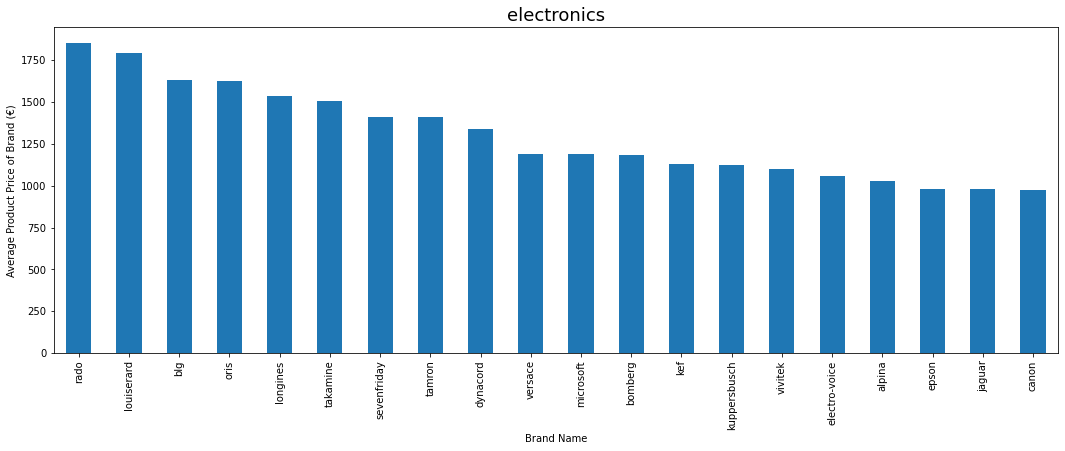

In [2]:
funcs.plot_average_price_brand_category(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv'])

In [3]:
sorted_series, highest_price_brands = funcs.category_brand_highest_price(data_sets=['data/2019-Oct.csv', 
                                                                                    'data/2019-Nov.csv'])

Running data_set: data/2019-Oct.csv


Running data_set: data/2019-Nov.csv


[========================================================================] 100%


Finished pre-processing data


In [4]:
sorted_series

parent_category  brand         
accessories      weekend           514.170000
                 coccinelle        274.288298
                 dometic           224.335714
                 omabelle          202.390000
                 persona           187.905000
                                      ...    
unknown_brand    heinz               1.131667
                 freshfruit          1.030000
                 clevercompany       1.030000
                 vakosa              0.990000
                 enlightenbrick      0.970000
Name: price, Length: 5611, dtype: float64

In [7]:
highest_price_brands.sort_values(ascending=False)

parent_category  brand        
sport            nordictrack      2522.590000
unknown_brand    yjfitness        2344.980000
computers        dreammachines    2187.495000
construction     helix            2001.485000
furniture        senspa           1988.458333
electronics      rado             1855.033448
kids             hartan           1801.820000
appliances       cooperhunter     1674.287500
apparel          sergiorossi       958.566429
auto             remeza            863.195714
country_yard     viking            702.049821
accessories      weekend           514.170000
stationery       hp                137.101417
medicine         omron              79.882472
Name: price, dtype: float64

## Research Question 4

How much does each brand earn per month? Write a function that given the name of a brand in input returns, for each month, its profit. Is the average price of products of different brands significantly different?
- Using the function you just created, find the top 3 brands that have suffered the biggest losses in earnings between one month and the next, specifing bothe the loss percentage and the 2 months (e.g., brand_1 lost 20% between march and april).


**Comments**:

Zhibek

## Research Question 5

In what part of the day is your store most visited? Knowing which days of the week or even which hours of the day shoppers are likely to visit your online store and make a purchase may help you improve your strategies. Create a plot that for each day of the week show the hourly average of visitors your store has.


**Comments**:

Nicola

In [11]:
full_data_set_view = full_data_set[full_data_set.event_type == 'view']
full_data_set_view['event_time_month'] = pd.to_datetime(full_data_set_view.event_time).dt.month
full_data_set_view['event_time_week_year'] = pd.to_datetime(full_data_set_view.event_time).dt.weekofyear
full_data_set_view['event_time_week'] = pd.to_datetime(full_data_set_view.event_time).dt.dayofweek
full_data_set_view['event_time_hour'] = pd.to_datetime(full_data_set_view.event_time).dt.hour

C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [14]:
final_group = full_data_set_view.groupby(['event_time_hour', 'event_time_week', 'event_time_week_year']).user_id.count()

In [6]:
final_group = full_data_set_view.groupby(['event_time_week', 'event_time_hour']).user_id.count()

In [15]:
final_group

event_time_hour  event_time_week  event_time_week_year
0                1                40                      1070
                 4                44                      8816
1                1                40                       121
2                1                40                      7617
Name: user_id, dtype: int64

In [9]:
final_group

event_time_week
1    54395.8125
4    57960.0000
Name: user_id, dtype: float64

## Research Question 6

The conversion rate of a product is given by the number of times a product has been bought over the number of times it has been visited. What's the conversion rate of your online store?
- Find the overall conversion rate of your store.
- Plot the number of purchases of each category and show the conversion rate of each category in decreasing order.

In [4]:
conversion_rate = funcs.conversion_rate(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv'])
conversion_rate

Running data_set: data/2019-Oct.csv


Running data_set: data/2019-Nov.csv


[========================================================================] 100%


0.0159

Running data_set: data/2019-Oct.csv


Running data_set: data/2019-Nov.csv


[========================================================================] 100%


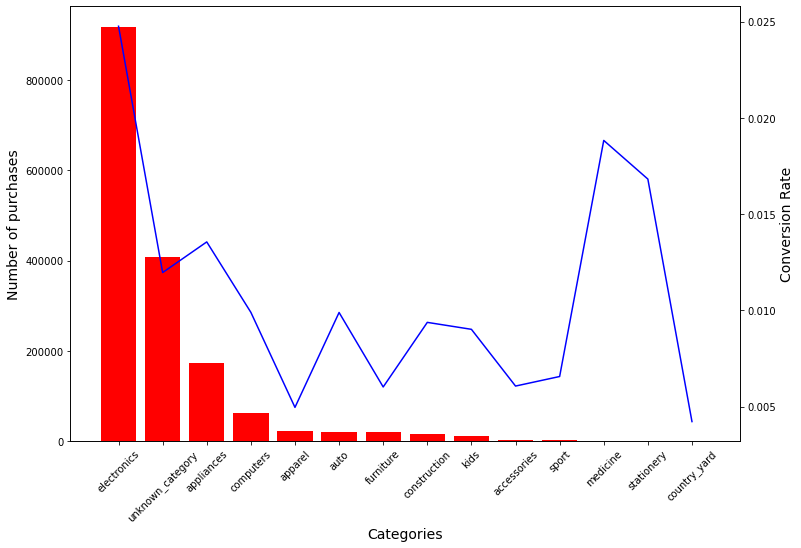

In [8]:
tot = funcs.conversion_rate_per_category(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv'])

## Research Question 7

The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes. Also known as 80/20 rule, in e-commerce simply means that most of your business, around 80%, likely comes from about 20% of your customers.
- Prove that the pareto principle applies to your store.


**Comments**:

1. Construct table with the income at user_id level (when event_type == 'purchase' what is the price paid by each user)
2. Construct array with the cumulative percentage of users and income
3. Construct illustrative plot to demonstrate pareto from the previous arrays

Running data_set: data/2019-Oct.csv


Running data_set: data/2019-Nov.csv


[========================================================================] 100%


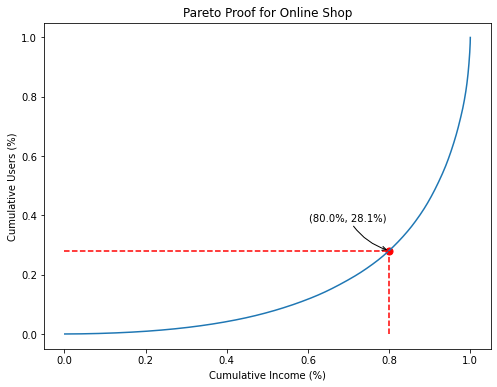

In [10]:
funcs.pareto_proof_online_shop(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv'], income_threshold=0.8)

### Algorithm optimisation

In [32]:
import pandas as pd

test_1 = pd.read_csv('data/2019-Oct.csv', nrows= 20)
test_2 = pd.read_csv('data/2019-Nov.csv', nrows= 20)
test_3 = pd.read_csv('data/2019-Oct.csv', names=['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'], nrows=20, skiprows=1000000)
test_4 = pd.read_csv('data/2019-Nov.csv', names=['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'], nrows=20, skiprows=1000000)
test_5 = pd.read_csv('data/2019-Oct.csv', names=['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'], nrows=20, skiprows=9000000)
test_6 = pd.read_csv('data/2019-Nov.csv', names=['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'], nrows=20, skiprows=9000000)
test_7 = pd.read_csv('data/2019-Oct.csv', names=['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'], nrows=20, skiprows=10000000)
test_8 = pd.read_csv('data/2019-Nov.csv', names=['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'], nrows=20, skiprows=10000000)

test_data_set = pd.concat((test_1, test_2, test_3, test_4, test_5, test_6, test_7, test_8), ignore_index=True)

In [33]:
test_data_set.to_excel('testing_data.xlsx')

In [34]:
import os

In [35]:
os.getcwd()

'C:\\Users\\juanm\\Documents\\Master\\Data Science\\Algorithmic_Methods_Data_Mining_Lab\\Project\\Homework_2'

In [2]:
test = pd.read_csv('tests/test_data/Question_6.csv')

In [3]:
len(test[test.event_type == 'view'])

154

In [4]:
len(test[test.event_type == 'purchase'])

2

In [42]:
unique_prices = test.drop_duplicates(subset=['parent_category', 'brand', 'product_id', 'price'])[
        ['parent_category', 'brand', 'product_id', 'price']]

In [43]:
unique_prices

,parent_category,brand,product_id,price
0,missing_brand,shiseido,44600062,35.79
1,appliances,aqua,3900821,33.20
2,furniture,missing_brand,17200506,543.10
3,computers,lenovo,1307067,251.74
4,electronics,apple,1004237,1081.98
...,...,...,...,...
155,electronics,apple,1002544,473.37
156,apparel,respect,28717004,71.82
157,missing_brand,cordiant,12709709,36.04
158,appliances,philips,3200361,93.64


In [4]:
x = pd.read_excel('tests/test_data/Question_6.xlsx', 'Results_2')

In [5]:
x

,category_name,Count View,Count Purchase,Conversion Rate
0,kids,3,1,0.333333
1,furniture,8,1,0.125000
2,computers,10,1,0.100000
3,unknown_category,43,2,0.046512
4,appliances,24,1,0.041667
5,accessories,1,0,0.000000
6,apparel,10,0,0.000000
7,auto,4,0,0.000000
8,construction,1,0,0.000000
9,electronics,50,0,0.000000


In [3]:
view

,view_count
parent_category,
accessories,1
apparel,10
appliances,24
auto,4
computers,10
construction,1
electronics,50
furniture,8
kids,3


In [4]:
purchase

,purchase_count
parent_category,
appliances,1
computers,1
furniture,1
kids,1
unknown_category,2


In [8]:
pd.concat([view, purchase], axis=1).fillna(0)

,view_count,purchase_count
accessories,1,0
apparel,10,0
appliances,24,1
auto,4,0
computers,10,1
construction,1,0
electronics,50,0
furniture,8,1
kids,3,1
unknown_category,43,2


[========================================================================] 100%


Running data_set: tests/test_data/Question_6.csv


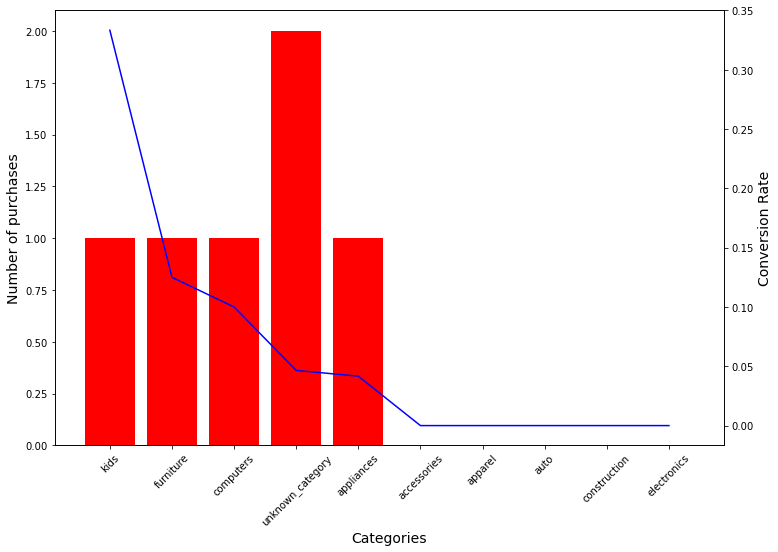

In [2]:
test = funcs.conversion_rate_per_category(data_sets=['tests/test_data/Question_6.csv'])

In [3]:
test

,view_count,purchase_count,conversion_rate
kids,3,1,0.333333
furniture,8,1,0.125000
computers,10,1,0.100000
unknown_category,43,2,0.046512
appliances,24,1,0.041667
accessories,1,0,0.000000
apparel,10,0,0.000000
auto,4,0,0.000000
construction,1,0,0.000000
electronics,50,0,0.000000


In [6]:
x

,category_name,Count View,Count Purchase,Conversion Rate
0,kids,3,1,0.333333
1,furniture,8,1,0.125000
2,computers,10,1,0.100000
3,unknown_category,43,2,0.046512
4,appliances,24,1,0.041667
5,accessories,1,0,0.000000
6,apparel,10,0,0.000000
7,auto,4,0,0.000000
8,construction,1,0,0.000000
9,electronics,50,0,0.000000


In [8]:
test.conversion_rate.values

array([0.33333333, 0.125     , 0.1       , 0.04651163, 0.04166667,
       0.        , 0.        , 0.        , 0.        , 0.        ])